# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2025

**Rotación de Personal - IBM**

#### **ERICK ALAN CUELLAR QUINTANILLA**
#### **A01383577**

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance".**

**El archivo consiste de 1470 registros:**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [1]:
# Importa aquí todas las librerías que consideres necesarias:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 

# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


La rotación es el porcentaje de empleados que abandonan una empresa, por razones voluntarias o involuntarias. 
Esto presenta diversos problemas, como lo son:

 + Los costos de contratar y capacitar nuevos empleados
 + Pérdida de experiencia valiosa difícil de reemplazar
 + Disminución de la productividad
 + Afecta la moral del equipo de trabajo


++++++++ Termina la sección de agregar texto. +++++++++++

#### **Descarga el archivo de datos de la página de Kaggle y lo cargamos como un DataFrame de Pandas. Utilizaremos el método “describe” con el argumento include= “all”.**

In [2]:
path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(path)

df = pd.DataFrame(data)

print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 2:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" de Pandas.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


No utilizar el argumento include="all" hará que solamente nos despliegue las estadísticas descriptivas de las columnas numéricos (int o float).

Incluir el argumento nos mostrará estadísticas descripitvas de columnas de tipo categórica o texto (object)

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 3:**

#### **Con base a la información desplegada por la instrucción anterior, se ha decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Únicamente se cuenta con un solo valor en toda la tabla, no aporta información relevante. Además, ningún empleado debería ser menor de 18 años.

**b)	EmployeeCount**: El dato no aporta valor al análisis, es el mismo valor para cada fila, pues cada empleado equivale a 1, no podemos tener empleados que valgan 0.5 o 2.

**c)	StandardHours**: Todos los empleados tienen las mismas horas de trabajo, según la tabla. A pesar de que puede ser un factor importante para nuestro análisis, no para un modelo predictivo donde todos nuestros datos presentan la misma información.

**d)	EmployeeNumber**: Es un dato único para cada empleado y no sirve para un análisis predictivo de ningun tipo, es un ID para cada fila.

++++++++ Termina la sección de agregar texto. +++++++++++




Una vez eliminadas las variables anteriores y de acuerdo a la documentación del problema, tenemos la siguiente información.

En las variables categóricas el entero dentro de los paréntesis indica el total de niveles de dicha variable.

In [3]:
# Se eliminan los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


**i. variables numéricas (14):**

NumCompaniesWorked,

TrainingTimesLastYear,

Age,

DailyRate,

DistanceFromHome,

HourlyRate,

MonthlyIncome,

MonthlyRate,

PercentSalaryHike,

TotalWorkingYears,

YearsAtCompany,

YearsInCurrentRole,

YearsSinceLastPromotion,

YearsWithCurrManager

**ii. Variables ordinales (9):**

Education (5),

EnvironmentSatisfaction (4),

JobInvolvement (4),

JobLevel (5),

JobSatisfaction (4),

PerformanceRating (2),

RelationshipSatisfaction (4),

StockOptionLevel (4),

WorkLifeBalance (4)

**iii. Variables binarias (3):**

Attrition (variable de salida),

Gender,

OverTime

**iv. Variables nominales (5):**

BusinessTravel (3),

Department (3),

EducationField (6),

JobRole (9),

MaritalStatus (3)

# **Ejercicio 4:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, con el porcentaje de cada uno que consideres más adecuado y tomando en cuenta los siguientes puntos:**

* **Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente.**

* **Realiza dicha partición conservando la estratificación de las clases de la variable de salida “Attrition”.**

* **Utilizar la semilla "random_state=17" en cada función de partición para permitir la repetibilidad de tu modelo.**

* **Finalmente despliega la dimensión de cada uno de estos tres conjuntos, así como el porcentaje de datos que hay en cada uno de ellos.**



In [51]:


print("Dimensiones y Porcentajes de la partición Train, Val, Test generada:")
print("-"*70)

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

X = df.drop('Attrition', axis=1)
y = df['Attrition']

Xtrainval, Xtest, ytrainval, ytest = train_test_split(
    X, y,
    test_size=0.15,
    random_state=17,
    stratify=y)

Xtrain, Xval, ytrain, yval = train_test_split(
    Xtrainval, ytrainval,
    test_size=0.25,
    random_state=17,
    stratify=ytrainval)

print(f"Training dataset: {len(Xtrain)} -> {len(Xtrain)/len(X)}")
print(f"Validation dataset: {len(Xval)} -> {len(Xval)/len(X)}")
print(f"Testing dataset: {len(Xtest)} -> {len(Xtest)/len(X)}")
# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++


Dimensiones y Porcentajes de la partición Train, Val, Test generada:
----------------------------------------------------------------------
Training dataset: 936 -> 0.636734693877551
Validation dataset: 313 -> 0.21292517006802722
Testing dataset: 221 -> 0.15034013605442176


# **Ejercicio 5:**


**a) Aplica la transformación LabelEncoder() de Sklearn a la variable“Attrition”, tomando en cuenta los siguientes puntos:**

* **Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT.**

* **Al aplicar la transformación LabelEncoder, deberás evitar el filtrado de información (data-leakage).**


In [52]:
# a)
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
le = LabelEncoder()
le.fit(ytrain)
ytrainT = pd.DataFrame({'Attrition': le.transform(ytrain)})
yvalT = pd.DataFrame({'Attrition': le.transform(yval)})
ytestT = pd.DataFrame({'Attrition': le.transform(ytest)})


# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


print('Porcentaje de datos en cada clase del conjunto de entrenamiento :\n', ytrainT['Attrition'].value_counts() / ytrainT.shape[0])

Porcentaje de datos en cada clase del conjunto de entrenamiento :
 Attrition
0    0.838675
1    0.161325
Name: count, dtype: float64



#### **Además, responde las siguientes preguntas:**

**b) Con base a la documentación de Sklearn, ¿a qué tipo de variables se debe aplicar la transformación LabelEncoder()?**

**c) Encuentra la proporción de datos de cada clase de la variable "ytrainT" y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

**d) ¿Cuál es el umbral del modelo base a superar para evitar modelos subentrenados?**

**e) Con base al contexto del problema, ¿qué significan los valores 0 (NO) y 1 (YES) de la varaible de salida Attrition?**


++++++++ Inicia la sección de agregar texto: ++++++++++++


b) Segun la documentación, LabelEncoder debería ser usada para los valores predictivos, o target values, lo equivalente a nuestra salida del modelo, y no la entrada.

c) La proporción de ytrainT es de 84-16, mayor a 80/20, por lo que si presentamos un problema de datos desbalanceados. Esto puede hacer que nuestro modelo tienda a predecir más el valor más repetido.

d) Un modelo subentrenado nos daría cerca de un 84% de accuracy, de solamente predecir el valor mayoritario, por lo que estamos apuntando a una precisión mayor.

e) El 0 es equivalente a una persona que no abandonó la empresa, 1 es que si la abandonó.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 6:**


#### **Incluye a continuación un análisis gáfico y descriptivo que consideres adecuado. Con base a estos gráficos deberás tomar la decisión de qué transformaciones aplicar a cada variable en el siguiente ejercicio**

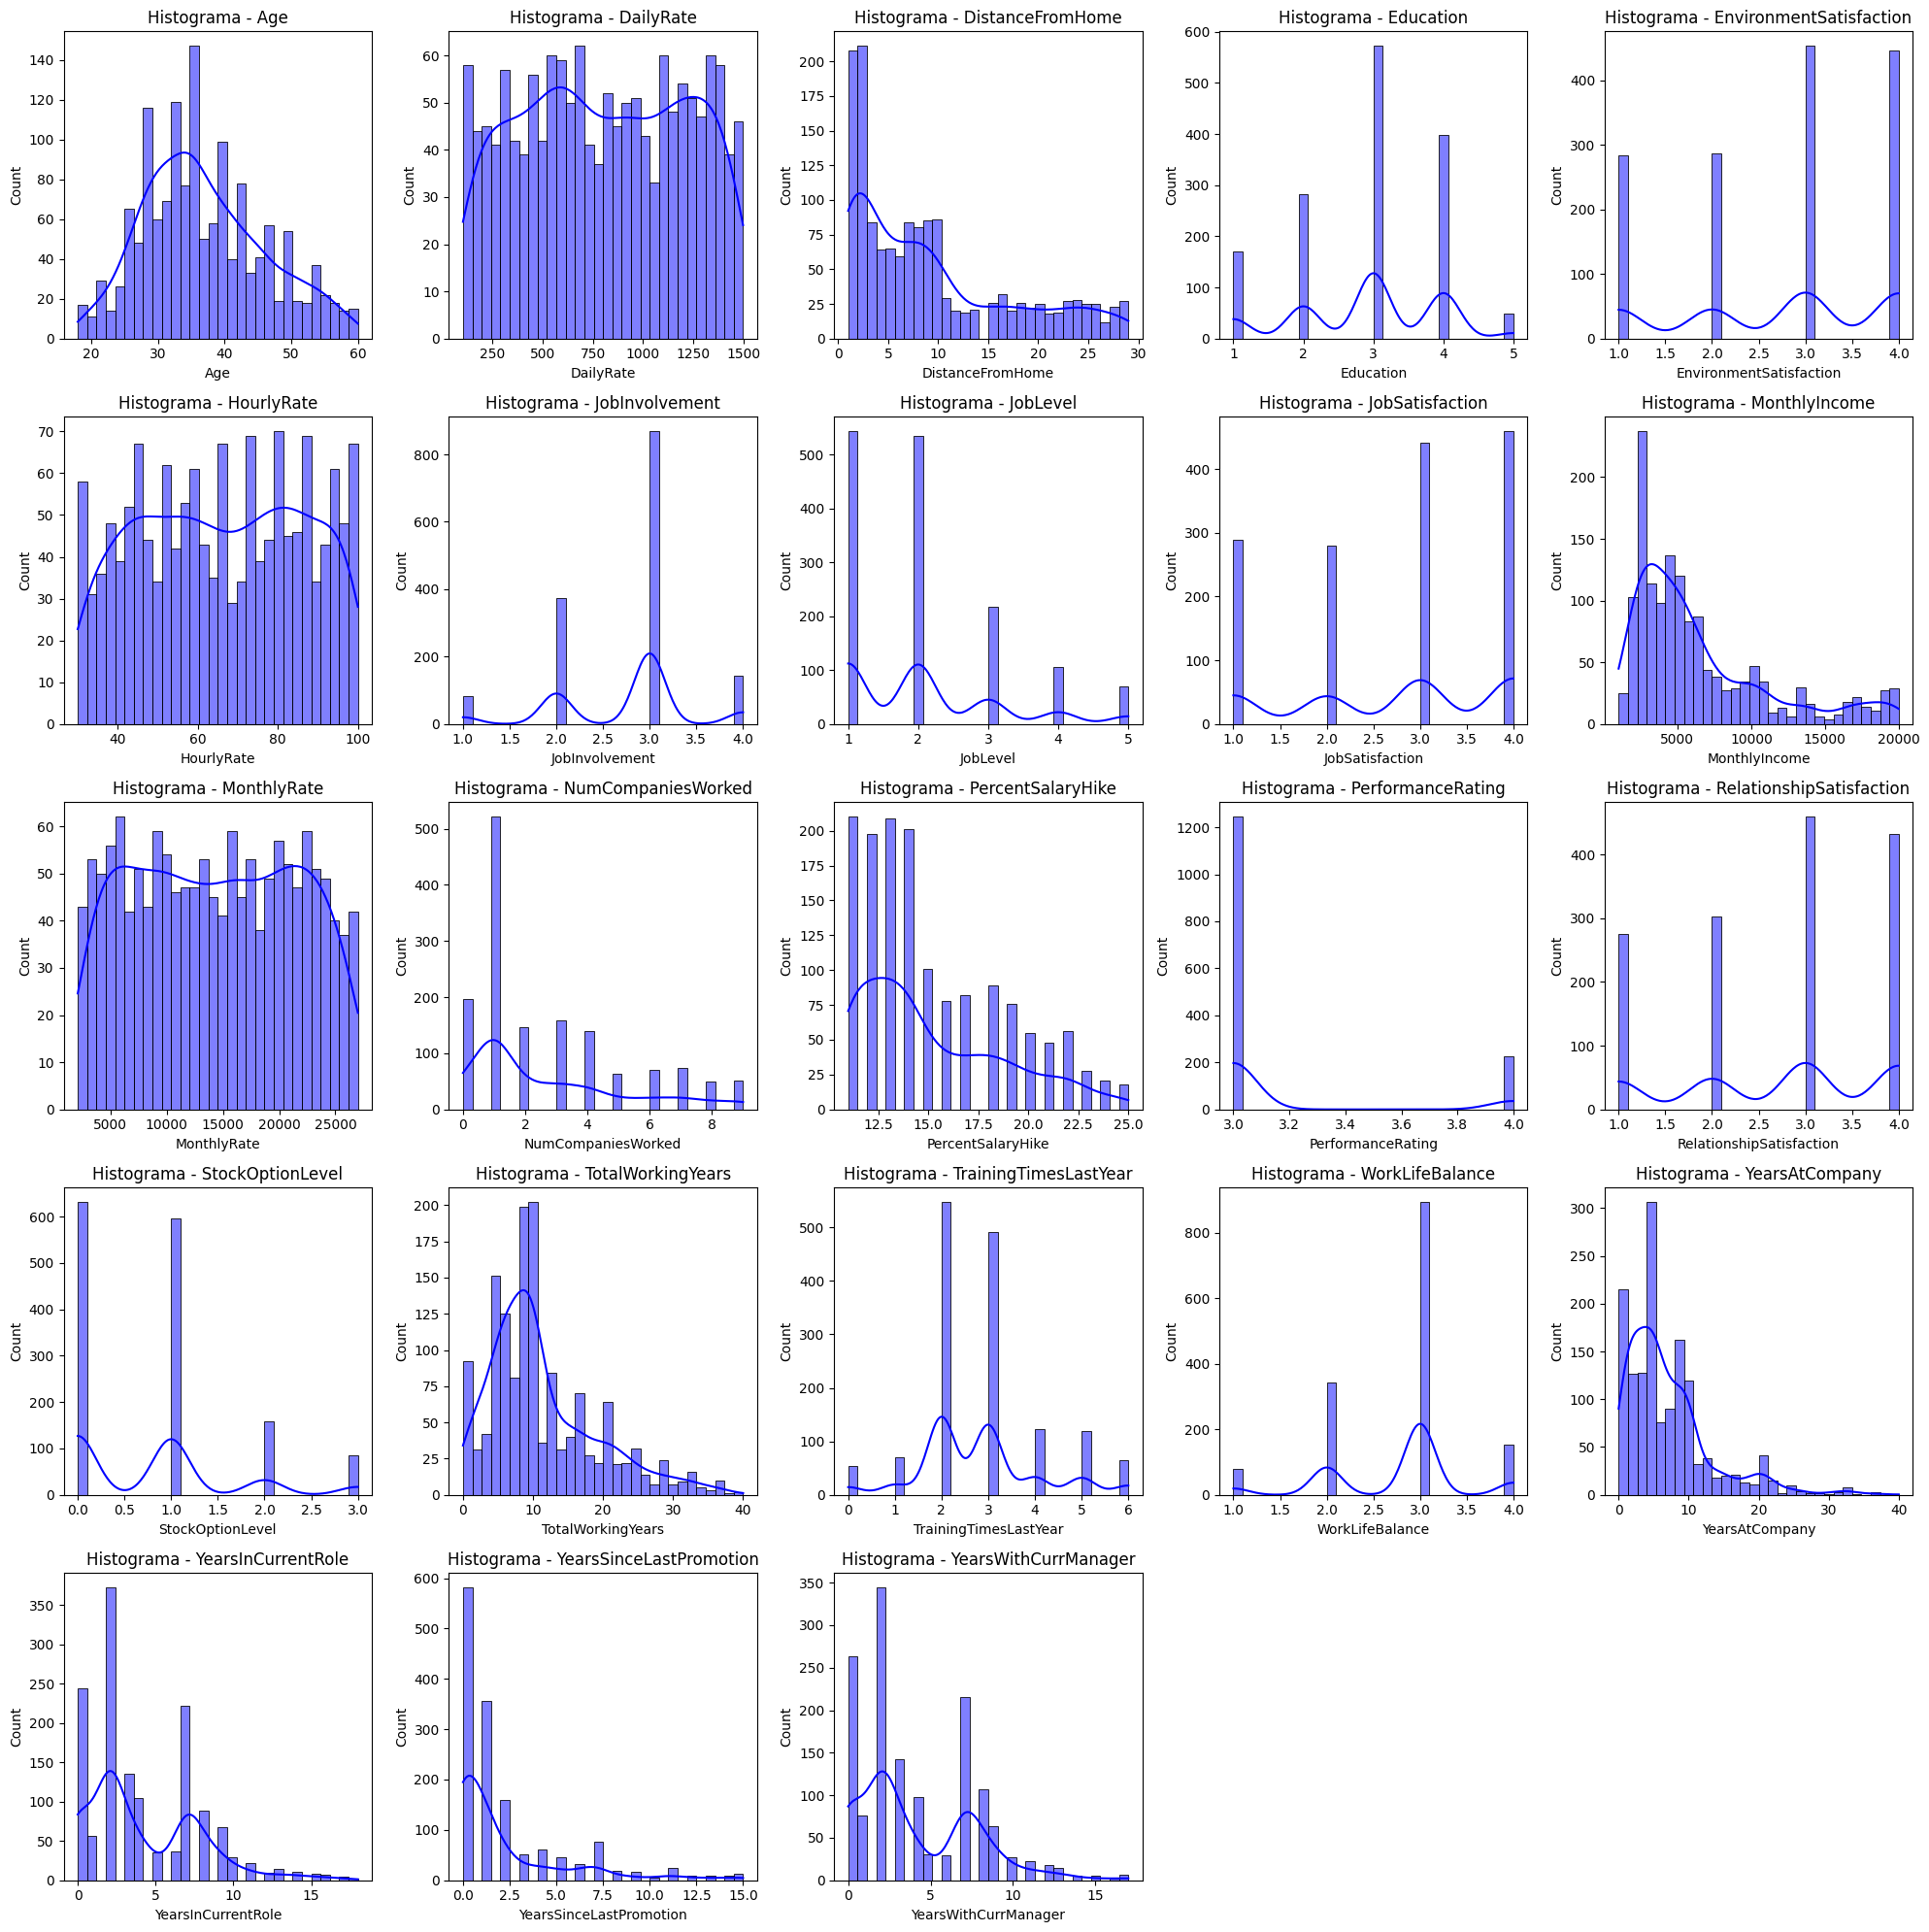

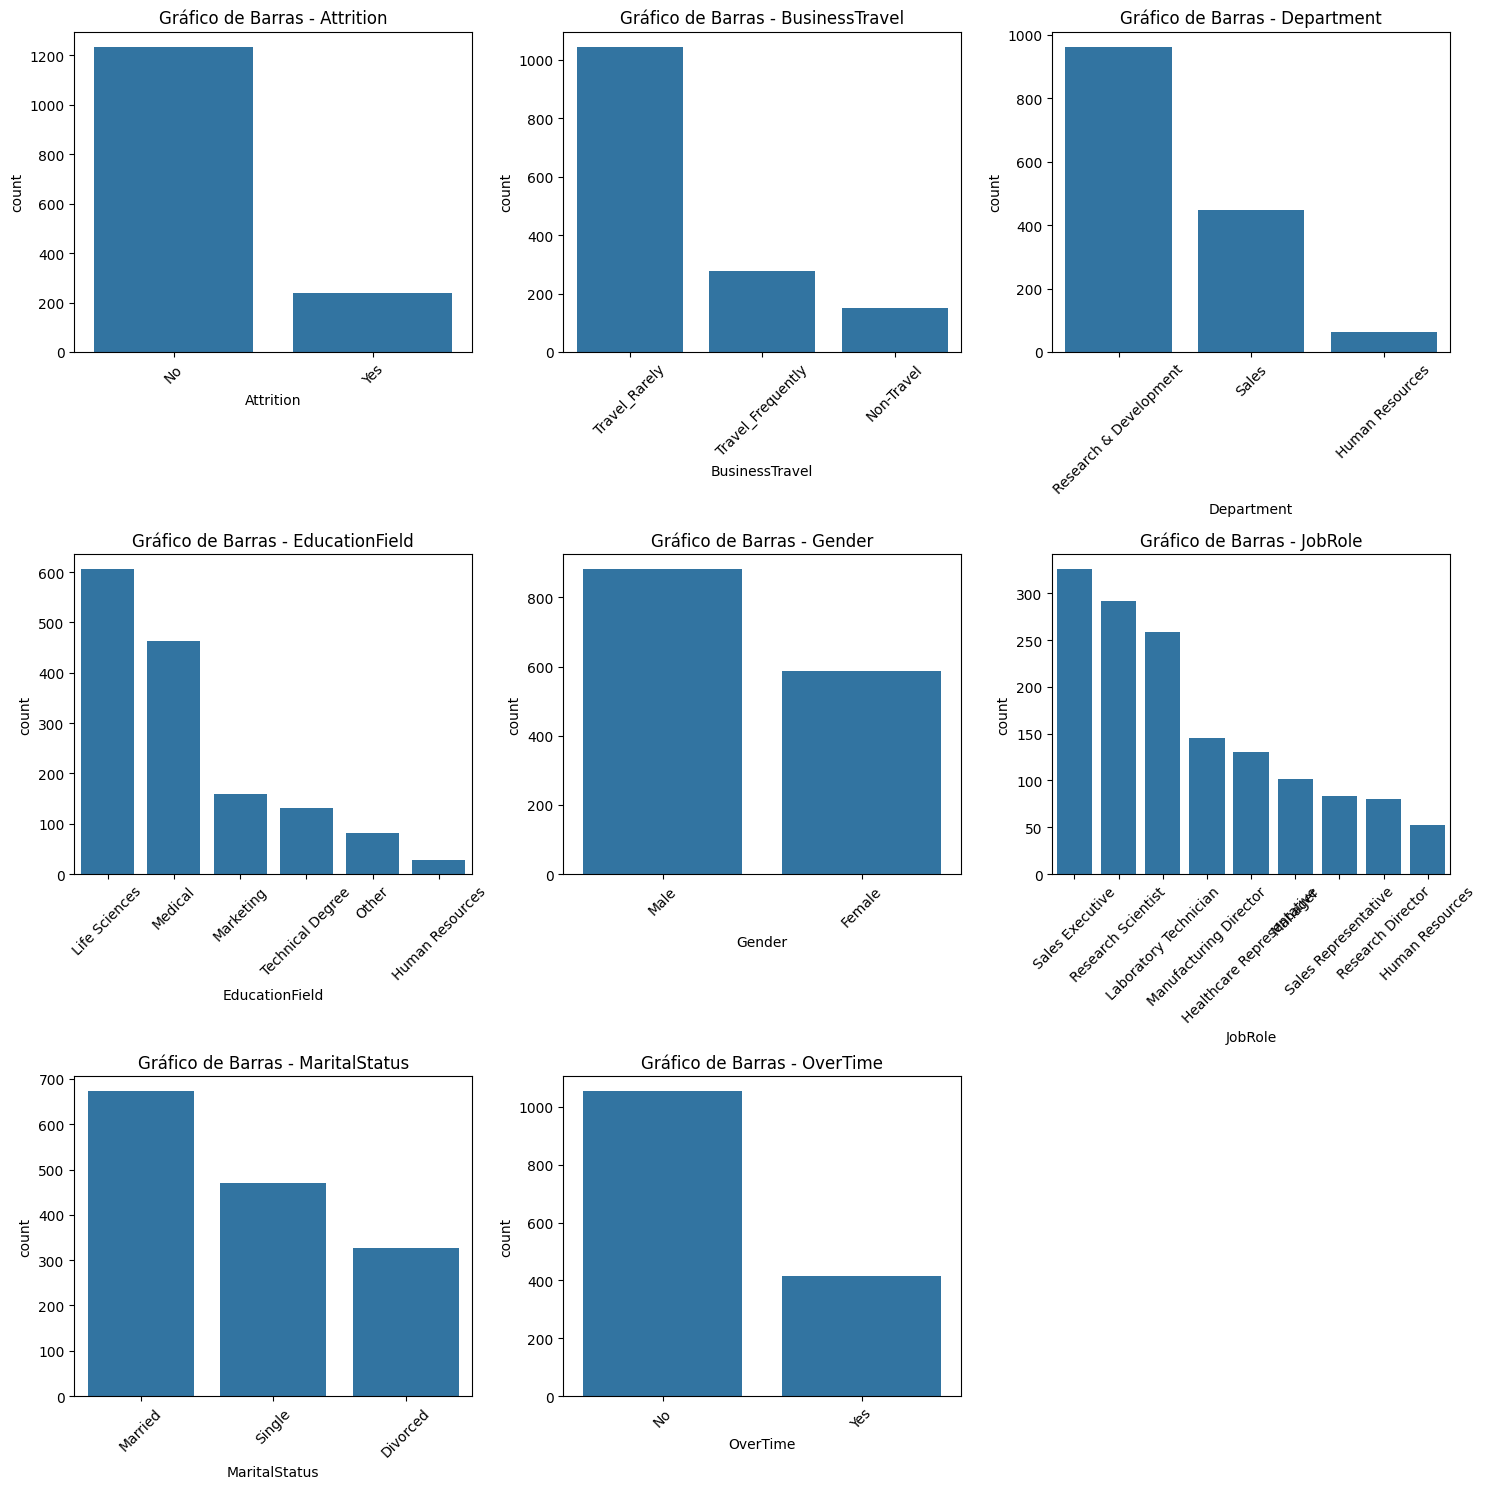

In [53]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres necesarias.

numeric_df = df.select_dtypes(include=['number'])
numeric_cols = numeric_df.columns
n_plots = len(numeric_cols)
n_cols = 5
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(numeric_df[col], kde=True, bins=30, ax=axes[i], color='blue')
    axes[i].set_title(f'Histograma - {col}')

for i in range(n_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


object_df = df.select_dtypes(include=['object'])
object_cols = object_df.columns
n_plots = len(object_cols)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(object_cols):
    sns.countplot(x=object_df[col], ax=axes[i], order=object_df[col].value_counts().index)
    axes[i].set_title(f'Gráfico de Barras - {col}')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(n_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# **Ejercicio 7:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberás aplicar a cada variable y de acuerdo a su tipo.**



In [54]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# NUMÉRICAS:
numericas_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
numericas_pipeline_nombres = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# ORDINALES:
catOrd_pipeline = Pipeline(steps=[('ordinal', OrdinalEncoder())])
catOrd_pipeline_nombres = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

# BINARIAS:
catBin_pipeline = Pipeline(steps=[('onehot_bin', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))])
catBin_pipeline_nombres = ['Gender', 'OverTime']

# NOMINALES:
catNom_pipeline = Pipeline(steps=[('onehot_nom', OneHotEncoder(handle_unknown='ignore'))])
catNom_pipeline_nombres = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

columnasTransformer = ColumnTransformer(transformers=[
    ('num', numericas_pipeline, numericas_pipeline_nombres),
    ('ord', catOrd_pipeline, catOrd_pipeline_nombres),
    ('bin', catBin_pipeline, catBin_pipeline_nombres),
    ('nom', catNom_pipeline, catNom_pipeline_nombres)
], remainder='passthrough')



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 8:**

* #### **Reagrupamos los conjuntos de entrenamiento y validación en un solo DataFrame. A estos nuevos DataFrame los llamaremos Xtv y ytv.**

* #### **¿Cuál es la justificación de agrupar en este paso los conjuntos de entrenamiento y validación?**

++++++++ Inicia la sección de agregar texto: ++++++++++++


Se hace para poder hacer validación cruzada, agrandando nuestro conjunto de datos de entrenamiento/validación

++++++++ Termina la sección de agregar texto. +++++++++++

In [55]:
Xtv = pd.concat([Xtrain, Xval], axis=0)
ytv = pd.concat([ytrainT, yvalT], axis=0)

print("Dimensión del conjunto Train+Val:")
print(Xtv.shape)
print(ytv.shape)

Dimensión del conjunto Train+Val:
(1249, 30)
(1249, 1)


# **Ejercicio 9:**

#### **Busca los mejores hiperparámetros para cada modelo.**


>> LR 0.878 (0.014)
>> LASSO 0.884 (0.015)
>> RIDGE 0.883 (0.014)
>> EN 0.884 (0.014)
>> kNN 0.845 (0.006)


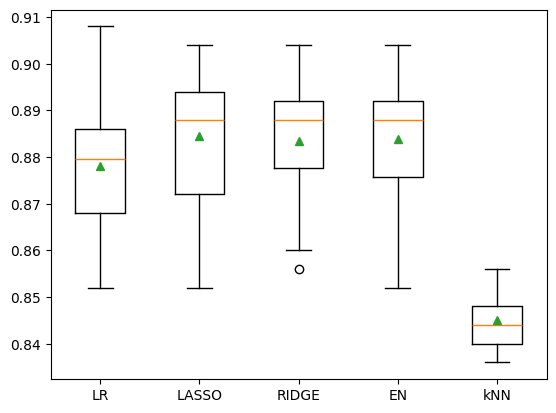

In [56]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs', max_iter=5000, C=1,    # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear', max_iter=5000, C=1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='liblinear', max_iter=5000, C=1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    l1_ratio=0.5, solver='saga', max_iter=5000, C=1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=13,    # Incluye aquí todos los hiperparámetros y valores que consideres adecuados
                                      ))
  nombres.append('kNN')


  return modelos, nombres




# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Pasamos al entrenamiento de los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, tick_labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()


# **Ejercicio 10:**

* #### **Utilizando el mejor modelo encontrado en el paso anterior y los datos Xtv, ytv, realiza ahora una búsqueda de malla para tratar de mejorar el desempeño de dicho modelo.**

* #### **Verifica además que el modelo no esté subentrenado o sobreentrenado.**

* #### **Llama "grid_result" al mejor modelo ajustado.**


* **NOTA: Para esta actividad diremos que el modelo no está sobreentrenado si la diferencia entre Train y Validation es menor al 3%.**


In [63]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

mejor_modelo = LogisticRegression(penalty='l2',
                                     max_iter=5000,    # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1)


dicc_grid = {
    "C" : [0.75,0.8,0.85,0.9],
    # "C" : [0.175,0.185,0.2,0.225,0.25,0.3,0.7,0.8,0.75,1,5,10],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}   # Incluye aquí todas las líneas de código que consideres adecuadas.


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

grid = GridSearchCV(estimator=mejor_modelo,
                    param_grid=dicc_grid,
                    cv = cv,
                    scoring='accuracy',
                    n_jobs=-1,
                    return_train_score=True)

Xx = columnasTransformer.fit_transform(Xtv)
grid_result = grid.fit(Xx, np.ravel(ytv))



# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Mejor modelo: 0.881238 usando {'C': 0.75, 'solver': 'lbfgs'}
Promedios Train mean(std): 0.8973(0.0058)
Promedios Val mean(std): 0.8807(0.0116)


# **Ejercicio 11:**

#### **Finalmente, usando el conjunto de prueba (Test), responder los siguientes incisos:**

#### **a) Obtener el desempeño final del mejor modelo con el reporte de métricas classification_report() de Sklearn.**

#### **b) Obtener la matriz de confusión del mejor modelo.**

#### **c) Interpreta los valores FP, FN obtenidos en  la matriz de confusión y de acuerdo al contexto del problema.**

#### **d) Incluye tus conclusiones de este mejor modelo y los pasos futuros a seguir.**

In [64]:
# a) Reporte del desempeño con classification_report():

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

XtestTransf = columnasTransformer.transform(Xtest)
y_pred = grid_result.predict(XtestTransf)
print(classification_report(ytestT, y_pred, target_names=['No','Yes']))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

              precision    recall  f1-score   support

          No       0.90      0.98      0.94       185
         Yes       0.80      0.44      0.57        36

    accuracy                           0.89       221
   macro avg       0.85      0.71      0.75       221
weighted avg       0.88      0.89      0.88       221



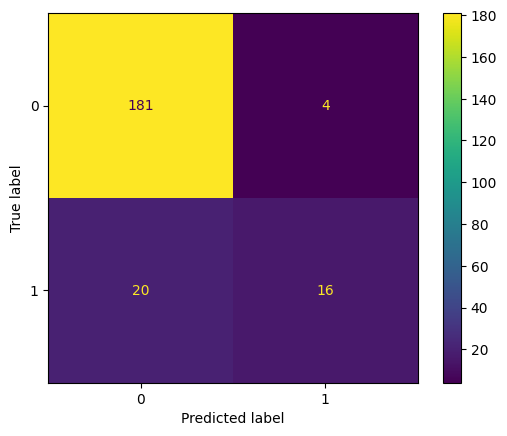

In [65]:
# b) Matriz de confusión:

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

XtestTransf = columnasTransformer.transform(Xtest)
ConfusionMatrixDisplay.from_estimator(grid_result, XtestTransf, np.ravel(ytestT))


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

plt.show()


*  c)
#### +++++++++ Inicia sección para incluir tus comentarios ++++++++++++++++++++++++

El modelo resultante logro tener buenos resultados para predecir datos de empleados que no rotaron, es decir, su especifidad. Sin embargo, su recall o sensitivity fue muy baja, muy probablemente causada por la desproporción de los datos. 
Este modelo difícilmente podrá predecir correctamente las personas que podrían rotar, y no nos ayudaría a solverntar el problema, por lo que sería mejor enfrentarlocon un enfoque distinto, agregando pesos diferentes al entrenamiento.

#### +++++++++ Termina sección para incluir tus comentarios ++++++++++++++++++++++++

* d)

#### +++++++++ Inicia sección para incluir tus comentarios ++++++++++++++++++++++++

Nuestro modelo necesitará más datos para personas que han rotado, datos que tal vez sea complicado obtenerlos en escenarios reales, y no nos gustaría esperar mucho a dejar ir talento, por lo que es importante buscar datos de otras empresas que nos puedan ser aplicables a nuestro caso.
Tambien es importante considerar que es mejor tener alta sensitividad, más que especifidad, por lo que debemos investigar como modificar nuestro entrenamiento para beneficiar la detección de rotación y atacar nuestro problema.
#### +++++++++ Termina sección para incluir tus comentarios ++++++++++++++++++++++++

# **Ejercicio 12**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

De este ejercicio se puede concluir la importancia del fine tunning de hiperparámetros, y como el método de grid search nos puede ayudar mucho en estos casos, siempre tomando en consideración el under u overfitting. Esto va de la mano con separar adecuadamente nuestro dataset en entrenamiento, validación y prueba, así como el uso eficiente de nuestros datasets de entrenamiento y validación para un mejor desempeño de nuestros modelos.


De igual manera, es importante considerar la diferencia de métodos de aprendizaje, como regresión logística o k-neighbors, ya que hay métodos que se pueden aplicar más a nuestros datos en contexto.


#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<